#The dataset contains information on clickstream from online store offering clothing for pregnant women.
#YEAR (2008)
#MONTH -> from April (4) to August (8)
#DAY -> day number of the month
#ORDER -> sequence of clicks during one session
#COUNTRY -> variable indicating the country of origin of the IP address
#SESSION ID -> variable indicating session id (short record)
#PAGE 1 (MAIN CATEGORY) -> concerns the main product category: 1-trousers, 2-skirts, 3-blouses, 4-sale
#PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product
#COLOUR -> colour of product
#LOCATION -> photo location on the page, the screen has been divided into six parts: 1-top left, 2-top in the middle, 3-top right, 4-bottom left, 5-bottom in the middle, 6-bottom right
#MODEL PHOTOGRAPHY -> variable with two categories: 1-en face, 2-profile
#PRICE -> price in US dollars
#PRICE 2 -> variable informing whether the price of a particular product is higher than the average price for the entire product category
#PAGE -> page number within the e-store website (from 1 to 5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('e-shop clothing 2008.csv',delimiter=";")
df2 = df.copy()
df2.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
year                       165474 non-null int64
month                      165474 non-null int64
day                        165474 non-null int64
order                      165474 non-null int64
country                    165474 non-null int64
session ID                 165474 non-null int64
page 1 (main category)     165474 non-null int64
page 2 (clothing model)    165474 non-null object
colour                     165474 non-null int64
location                   165474 non-null int64
model photography          165474 non-null int64
price                      165474 non-null int64
price 2                    165474 non-null int64
page                       165474 non-null int64
dtypes: int64(13), object(1)
memory usage: 17.7+ MB


,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [4]:
# Convert categorical variables to string
country = {
    1:'Australia',
    2:'Austria',
    3:'Belgium',
    4:'British Virgin Islands',
    5:'Cayman Islands',
    6:'Christmas Island',
    7:'Croatia',
    8:'Cyprus',
    9:'Czech Republic',
    10:'Denmark',
    11:'Estonia',
    12:'unidentified',
    13:'Faroe Islands',
    14:'Finland',
    15:'France',
    16:'Germany',
    17:'Greece',
    18:'Hungary',
    19:'Iceland',
    20:'India',
    21:'Ireland',
    22:'Italy',
    23:'Latvia',
    24:'Lithuania',
    25:'Luxembourg',
    26:'Mexico',
    27:'Netherlands',
    28:'Norway',
    29:'Poland',
    30:'Portugal',
    31:'Romania',
    32:'Russia',
    33:'San Marino',
    34:'Slovakia',
    35:'Slovenia',
    36:'Spain',
    37:'Sweden',
    38:'Switzerland',
    39:'Ukraine',
    40:'United Arab Emirates',
    41:'United Kingdom',
    42:'USA',
    43:'biz (*.biz)',
    44:'com (*.com)',
    45:'int (*.int)',
    46:'net (*.net)',
    47:'org (*.org)',
}

main_cat = {
    1:'trousers',
    2:'skirts',
    3:'blouses',
    4:'sale',
}

color = {
    1:'beige',
    2:'black',
    3:'blue',
    4:'brown',
    5:'burgundy',
    6:'gray',
    7:'green',
    8:'navy blue',
    9:'of many colors',
    10:'olive',
    11:'pink',
    12:'red',
    13:'violet',
    14:'white',
}

location = {
    1:'top left',
    2:'top in the middle',
    3:'top right',
    4:'bottom left',
    5:'bottom in the middle',
    6:'bottom right',
}

model_photo = {
    1:'en face',
    2:'profile',
}

def model_photo_change(x):
    return model_photo[x]

def location_change(x):
    return location[x]

def color_change(x):
    return color[x]

def country_change(x):
    return country[x]

def main_cat_change(x):
    return main_cat[x]

def price2(x):
    return abs(x-2)

df['price 2'] = df['price 2'].apply(price2)
df["country"] = df["country"].apply(country_change)
df["page 1 (main category)"] = df["page 1 (main category)"].apply(main_cat_change)
df["colour"] = df["colour"].apply(color_change)
df["location"] = df["location"].apply(location_change)
df["model photography"] = df["model photography"].apply(model_photo_change)
df['page'] = df['page'].astype(str)

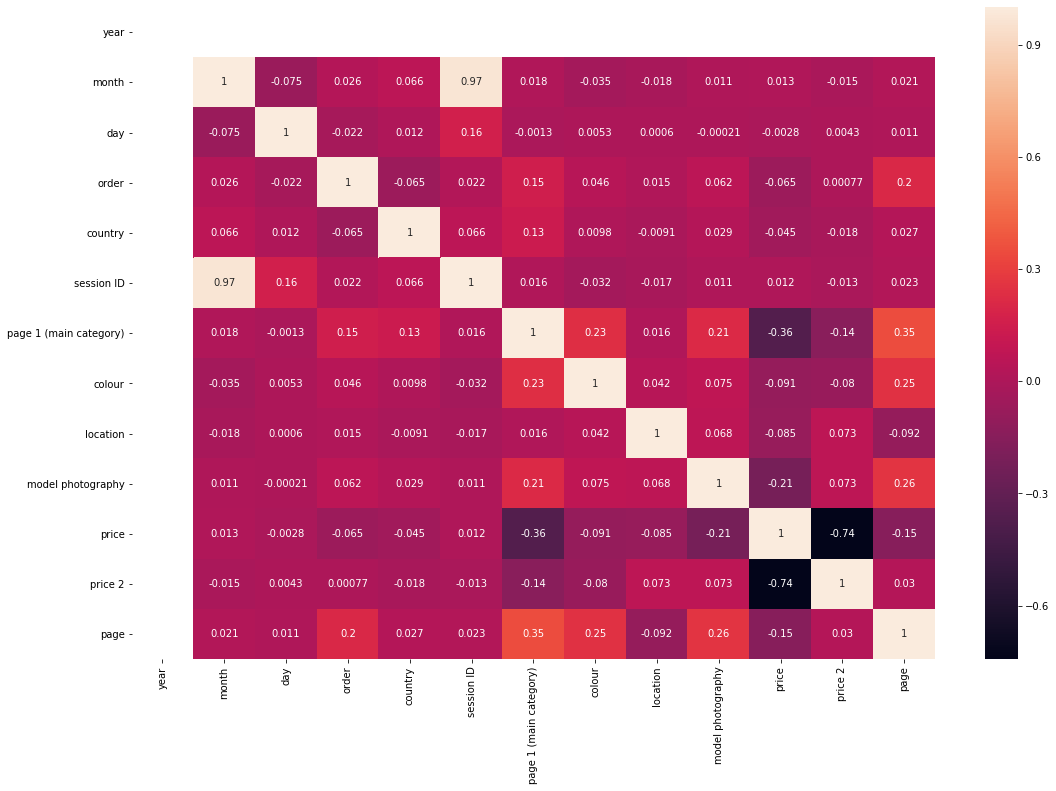

In [5]:
fig = plt.figure(figsize=(18,12))
sns.heatmap(df2.corr(),annot=True)

Text(0.5, 0, 'count')

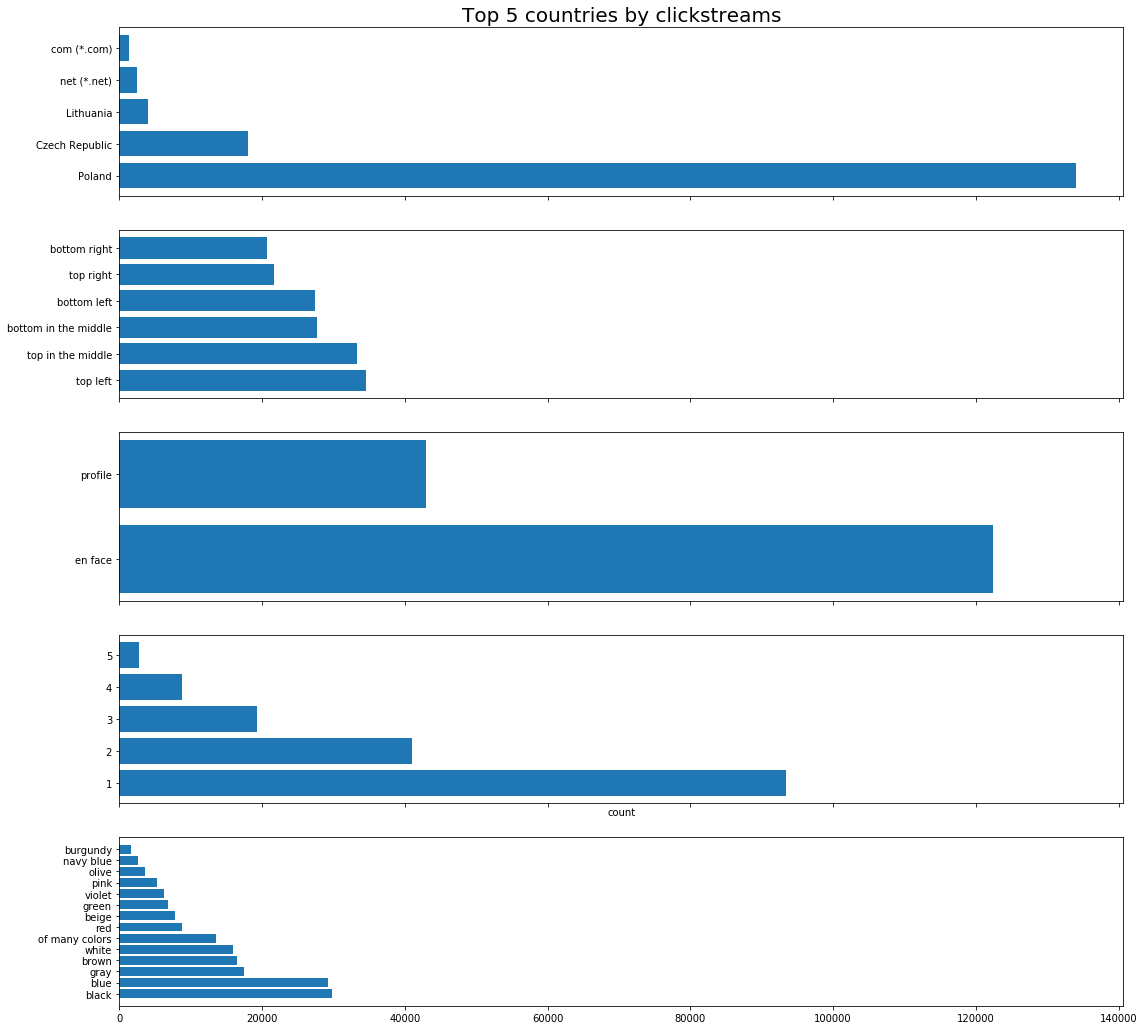

In [17]:
# df["country"].value_counts().head()
# df["page 1 (main category)"].value_counts()
# df["colour"].value_counts().head()
# df["location"].value_counts()
# df["model photography"].value_counts()
# df["order"].value_counts().head()
# df["session ID"].value_counts().head()
fig, ax = plt.subplots(5, figsize=(18, 18), sharex=True)
ax[0].barh(df["country"].value_counts().index[:5],df["country"].value_counts()[:5])
ax[0].set_title("Top 5 countries by clickstreams",fontdict = {"fontsize":20})
ax[1].barh(df["location"].value_counts().index,df["location"].value_counts())
ax[2].barh(df["model photography"].value_counts().index,df["model photography"].value_counts())
ax[3].barh(df["page"].value_counts().index,df["page"].value_counts())
ax[4].barh(df["colour"].value_counts().index,df["colour"].value_counts())
ax[3].set_xlabel('count')

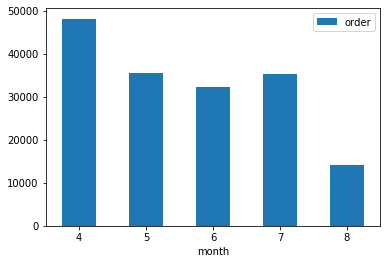

In [9]:
orders_df = df[['order'] + ['month']]
orders_df.groupby('month').count().plot(kind='bar', rot=0) 

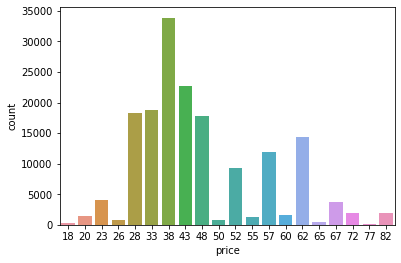

In [18]:
sns.countplot(df["price"])

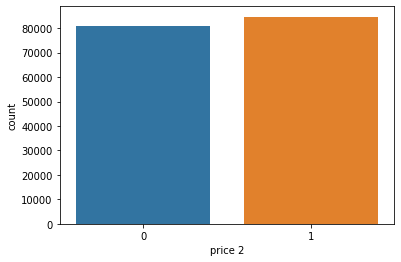

In [19]:
sns.countplot(df["price 2"])

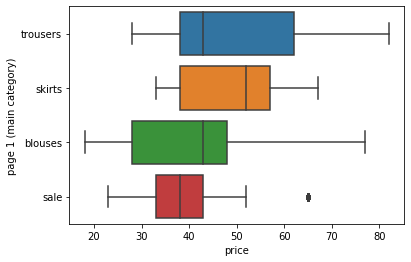

In [11]:
sns_plot = sns.boxplot(x="price", y="page 1 (main category)", data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE05FEE518>],
      dtype=object)

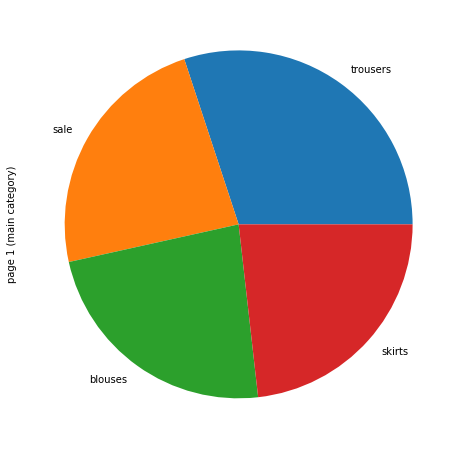

In [13]:
df["page 1 (main category)"].value_counts().plot.pie(subplots=True,figsize=(12,8))

In [4]:
# df["Date"] = df["year"].astype('str') + df["month"].astype('str') + df["day"].astype('str')
# df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

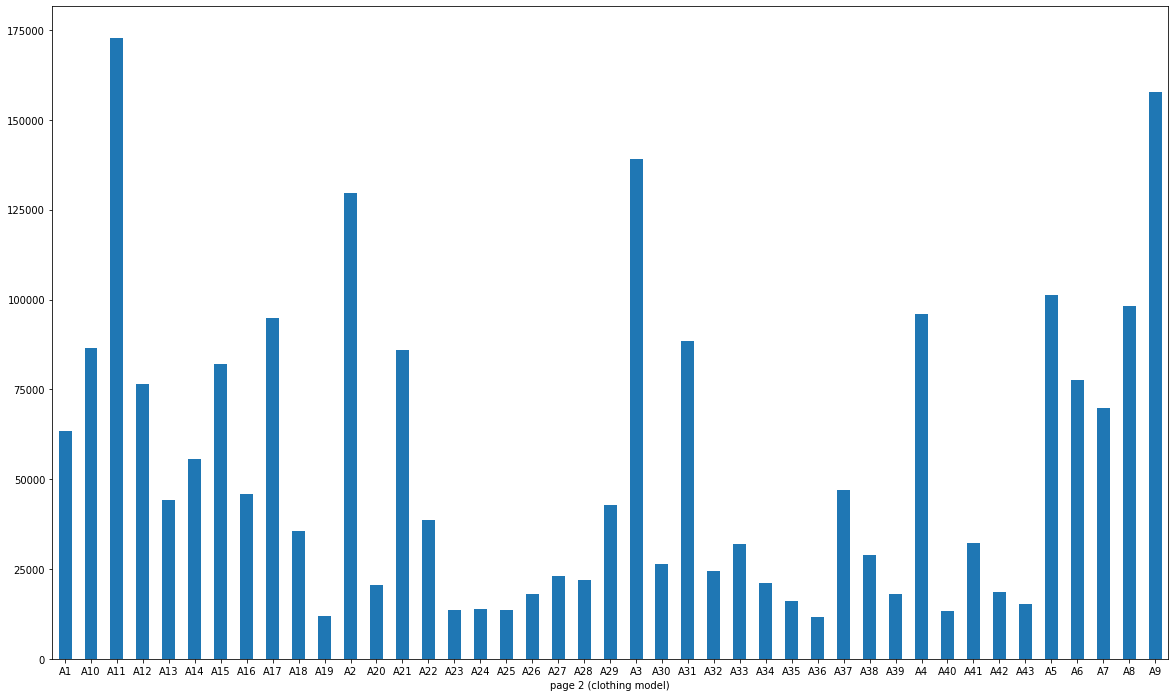

In [41]:
model = df["page 2 (clothing model)"].value_counts()
# plt.plot(df[df["page 2 (clothing model)"] in model.index]["price"], model)
fig = plt.figure(figsize=(20,12))
df.groupby('page 2 (clothing model)')["price"].sum()[:43].plot(kind='bar', rot=0)

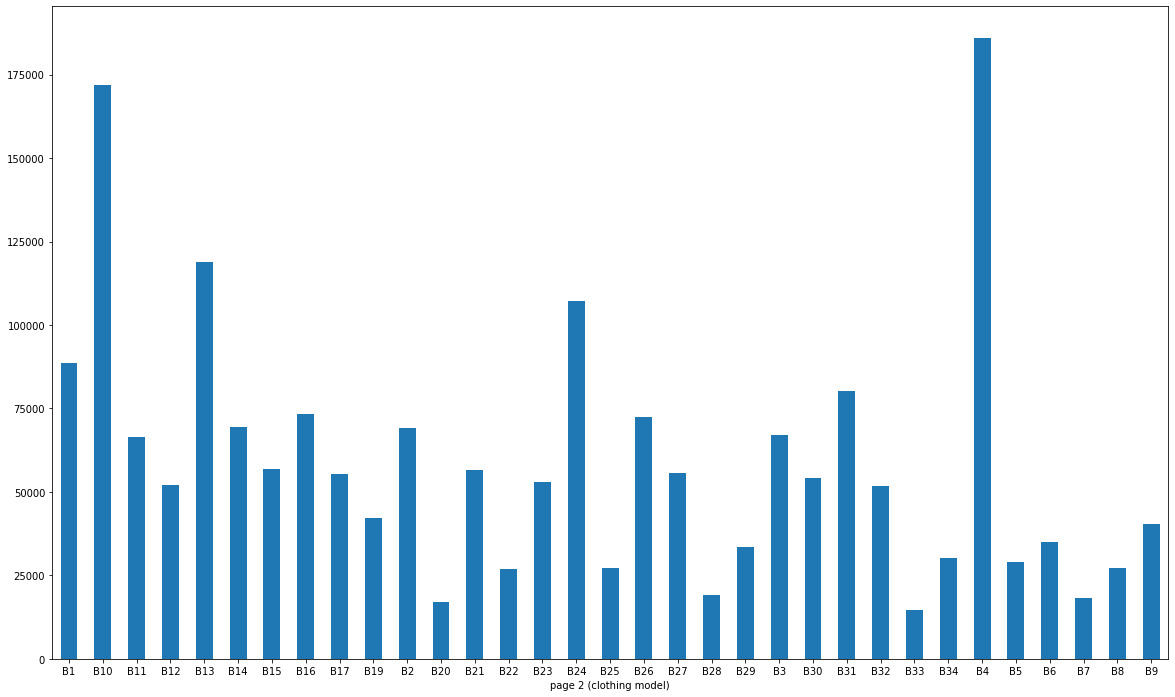

In [42]:
fig = plt.figure(figsize=(20,12))
df.groupby('page 2 (clothing model)')["price"].sum()[43:76].plot(kind='bar', rot=0)

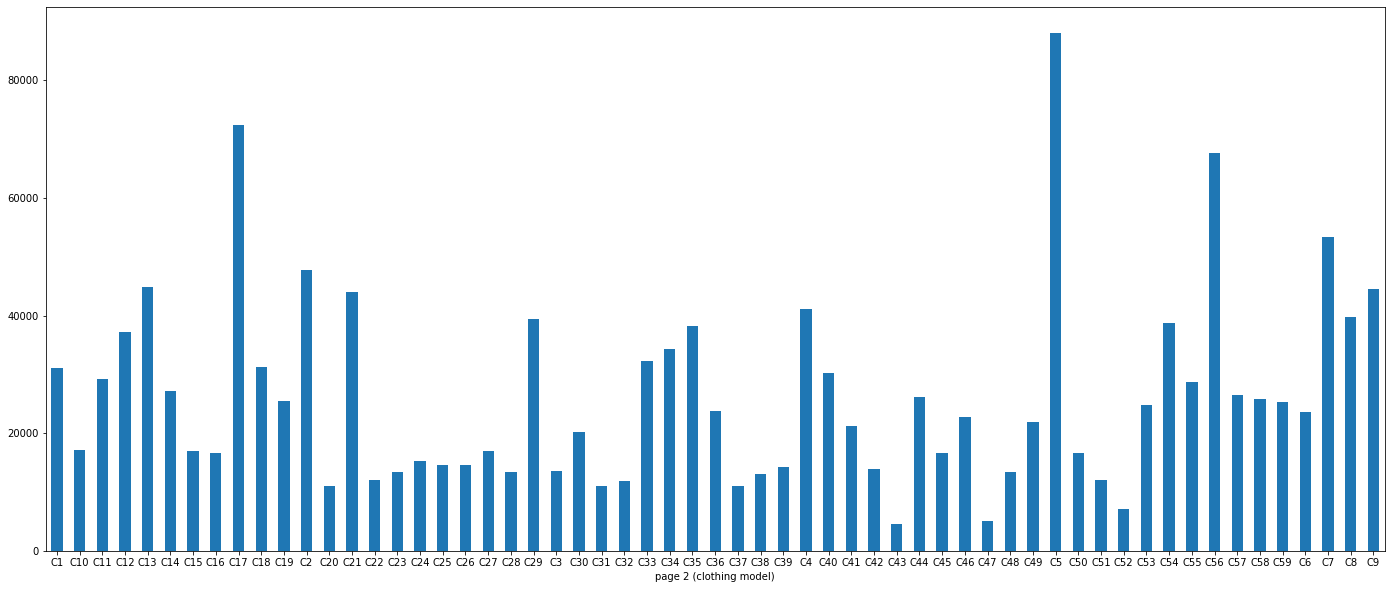

In [43]:
fig = plt.figure(figsize=(24,10))
df.groupby('page 2 (clothing model)')["price"].sum()[76:135].plot(kind='bar', rot=0)

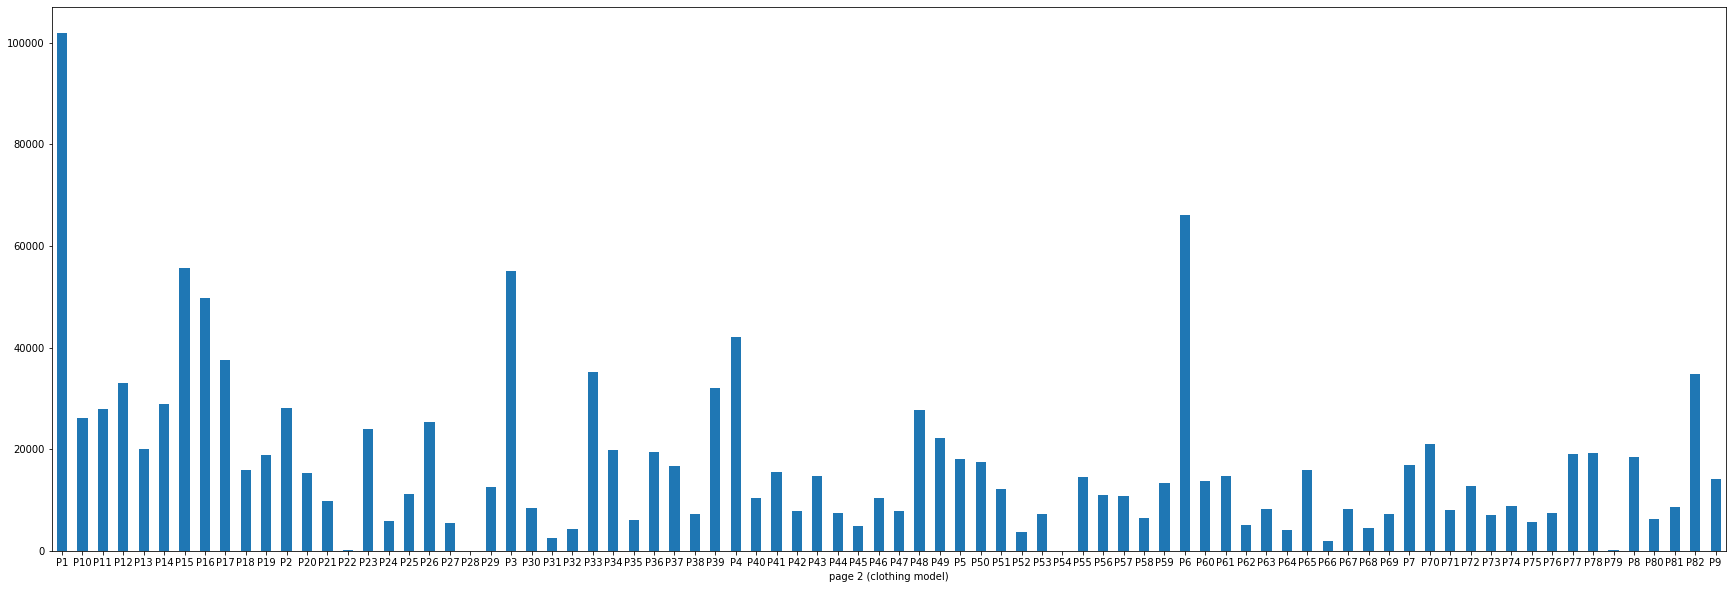

In [44]:
fig = plt.figure(figsize=(30,10))
df.groupby('page 2 (clothing model)')["price"].sum()[135:].plot(kind='bar', rot=0)

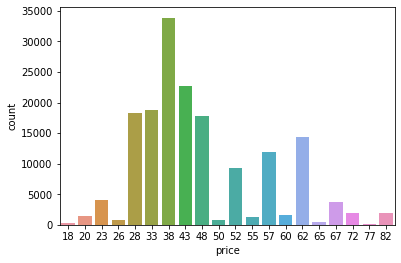

In [71]:
sns.countplot(df["price"])

In [5]:
def price_type(x):
    if x <= 27:
        return 0
    elif x > 27 and x <= 49:
        return 1
    elif x > 49 and x <= 63:
        return 2
    elif x > 63:
        return 3
df["price_type"] = df["price"].apply(price_type)

In [6]:
df = pd.get_dummies(df, columns=['colour','page 1 (main category)','location','model photography','page'])
df.head()

,year,month,day,order,country,session ID,page 2 (clothing model),price,price 2,price_type,...,location_top in the middle,location_top left,location_top right,model photography_en face,model photography_profile,page_1,page_2,page_3,page_4,page_5
0,2008,4,1,1,Poland,1,A13,28,0,1,...,0,0,0,1,0,1,0,0,0,0
1,2008,4,1,2,Poland,1,A16,33,0,1,...,0,0,0,1,0,1,0,0,0,0
2,2008,4,1,3,Poland,1,B4,52,1,2,...,1,0,0,1,0,1,0,0,0,0
3,2008,4,1,4,Poland,1,B17,38,0,1,...,0,0,0,0,1,1,0,0,0,0
4,2008,4,1,5,Poland,1,B8,52,1,2,...,0,0,1,0,1,1,0,0,0,0


In [6]:
# df.info()

# SGD Regressor

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [47]:
print(df.columns)
X = df.drop(["year", "country", "price", 'page 2 (clothing model)'], axis=1)
y = df['price']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'colour_beige',
       'colour_black', 'colour_blue', 'colour_brown', 'colour_burgundy',
       'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
sgd_model = SGDRegressor(random_state=101)
reg = make_pipeline(StandardScaler(), sgd_model)

In [50]:
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=101, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [51]:
coef_df = pd.DataFrame(sgd_model.coef_, X.columns, columns = ['Coefficient'])
coef_df

,Coefficient
month,0.363820
day,0.061830
order,0.083784
session ID,-0.212051
price 2,9.665806
colour_beige,-0.586171
colour_black,0.166331
colour_blue,1.214277
colour_brown,-0.083400
colour_burgundy,0.314191


In [52]:
pred = reg.predict(X_test)

In [53]:
score = reg.score(X_train,y_train)
cv_score = cross_val_score(reg, X_train, y_train, cv = 10)
mse = mean_squared_error(y_test, pred)
print("CV mean score: ", cv_score.mean())
print("R-squared:", score)
print('MAE:', mean_absolute_error(y_test, pred))
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

CV mean score:  0.8413797504491438
R-squared: 0.8415186402535065
MAE: 3.7342984374989365
MSE:  25.071176762990422
RMSE:  5.007112617366462


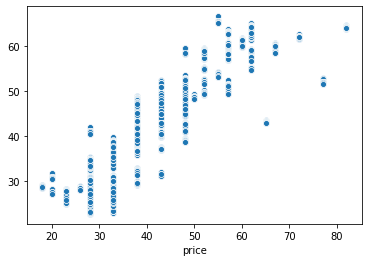

In [54]:
sns.scatterplot(y_test,pred)

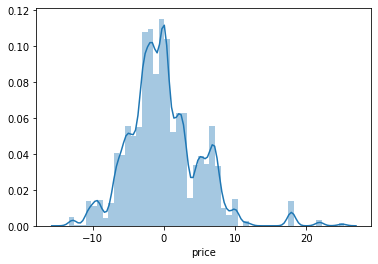

In [55]:
sns.distplot((y_test-pred), bins=50)

# SGD Classifier

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [8]:
#predict price 2
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price 2'], axis=1)
y = df['price 2']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'price_type',
       'colour_beige', 'colour_black', 'colour_blue', 'colour_brown',
       'colour_burgundy', 'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [9]:
#predict price_type
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price_type'], axis=1)
y = df['price_type']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'price_type',
       'colour_beige', 'colour_black', 'colour_blue', 'colour_brown',
       'colour_burgundy', 'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
sgd_cls = SGDClassifier(random_state=101)
clf = make_pipeline(StandardScaler(), sgd_cls)

In [12]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=101,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [13]:
predictions = clf.predict(X_test)

In [14]:
print(confusion_matrix(y_test,predictions))

[[  180  1173     0     0]
 [    0 22258    57     0]
 [    0   313  7482     0]
 [    0     0     0  1632]]


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23      1353
           1       0.94      1.00      0.97     22315
           2       0.99      0.96      0.98      7795
           3       1.00      1.00      1.00      1632

    accuracy                           0.95     33095
   macro avg       0.98      0.77      0.79     33095
weighted avg       0.96      0.95      0.94     33095



# SVC

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [65]:
#predict price 2
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price 2'], axis=1)
y = df['price 2']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'colour_beige',
       'colour_black', 'colour_blue', 'colour_brown', 'colour_burgundy',
       'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [17]:
#predict price_type
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price_type'], axis=1)
y = df['price_type']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'price_type',
       'colour_beige', 'colour_black', 'colour_blue', 'colour_brown',
       'colour_burgundy', 'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
svc_cls = SVC(random_state=101)
clf = make_pipeline(StandardScaler(), svc_cls)

In [20]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=101, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [21]:
predictions = clf.predict(X_test)

In [22]:
print(confusion_matrix(y_test,predictions))

[[ 1353     0     0     0]
 [    0 22313     2     0]
 [    0     0  7795     0]
 [    0     0     2  1630]]


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00     22315
           2       1.00      1.00      1.00      7795
           3       1.00      1.00      1.00      1632

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



# Decision Trees and Random Forests

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [73]:
#predict price 2
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price 2'], axis=1)
y = df['price 2']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'colour_beige',
       'colour_black', 'colour_blue', 'colour_brown', 'colour_burgundy',
       'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [25]:
#predict price_type
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price_type'], axis=1)
y = df['price_type']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'price_type',
       'colour_beige', 'colour_black', 'colour_blue', 'colour_brown',
       'colour_burgundy', 'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
predictions = dtree.predict(X_test)

In [30]:
print(confusion_matrix(y_test, predictions))

[[ 1353     0     0     0]
 [    0 22315     0     0]
 [    0     0  7795     0]
 [    0     0     0  1632]]


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00     22315
           2       1.00      1.00      1.00      7795
           3       1.00      1.00      1.00      1632

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



In [32]:
rfc = RandomForestClassifier()

In [33]:
rfc.fit(X_train,np.ravel(y_train))

C:\Users\Zhenya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rfc_pred = rfc.predict(X_test)

In [35]:
print(confusion_matrix(y_test, rfc_pred))

[[ 1353     0     0     0]
 [    0 22315     0     0]
 [    0     0  7795     0]
 [    0     0     0  1632]]


In [36]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1353
           1       1.00      1.00      1.00     22315
           2       1.00      1.00      1.00      7795
           3       1.00      1.00      1.00      1632

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



# K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [86]:
#predict price 2
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price 2'], axis=1)
y = df['price 2']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'colour_beige',
       'colour_black', 'colour_blue', 'colour_brown', 'colour_burgundy',
       'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [38]:
#predict price_type
print(df.columns)
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price_type'], axis=1)
y = df['price_type']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 2 (clothing model)', 'price', 'price 2', 'price_type',
       'colour_beige', 'colour_black', 'colour_blue', 'colour_brown',
       'colour_burgundy', 'colour_gray', 'colour_green', 'colour_navy blue',
       'colour_of many colors', 'colour_olive', 'colour_pink', 'colour_red',
       'colour_violet', 'colour_white', 'page 1 (main category)_blouses',
       'page 1 (main category)_sale', 'page 1 (main category)_skirts',
       'page 1 (main category)_trousers', 'location_bottom in the middle',
       'location_bottom left', 'location_bottom right',
       'location_top in the middle', 'location_top left', 'location_top right',
       'model photography_en face', 'model photography_profile', 'page_1',
       'page_2', 'page_3', 'page_4', 'page_5'],
      dtype='object')


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
clf = make_pipeline(StandardScaler(), knn)

In [41]:
clf.fit(X_train,np.ravel(y_train))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [42]:
pred = clf.predict(X_test)

In [43]:
print(confusion_matrix(y_test,pred))

[[ 1349     4     0     0]
 [   10 22299     6     0]
 [    0     4  7791     0]
 [    0     2     0  1630]]


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1353
           1       1.00      1.00      1.00     22315
           2       1.00      1.00      1.00      7795
           3       1.00      1.00      1.00      1632

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



In [46]:
X = df.drop(['year', 'country', 'page 2 (clothing model)', 'price_type'], axis=1)
y = pd.get_dummies(df['price_type'])
y.head()

,0,1,2,3
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
#SGD classifier
sgd_cls = SGDClassifier(random_state=101)
clf = make_pipeline(StandardScaler(), sgd_cls)

In [57]:
#KNN classifier
knn = KNeighborsClassifier()
clf = make_pipeline(StandardScaler(), knn)

In [62]:
#SVC classifier
svc_cls = SVC(random_state=101)
clf = make_pipeline(StandardScaler(), svc_cls)

In [63]:
clf.fit(X_train,y_train[0])
predictions = clf.predict(X_test)
print(confusion_matrix(y_test[0],predictions))
print(classification_report(y_test[0],predictions))

[[31752     0]
 [    1  1342]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31752
           1       1.00      1.00      1.00      1343

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



In [64]:
clf.fit(X_train,y_train[1])
predictions = clf.predict(X_test)
print(confusion_matrix(y_test[1],predictions))
print(classification_report(y_test[1],predictions))

[[10749     0]
 [    2 22344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10749
           1       1.00      1.00      1.00     22346

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



In [65]:
clf.fit(X_train,y_train[2])
predictions = clf.predict(X_test)
print(confusion_matrix(y_test[2],predictions))
print(classification_report(y_test[2],predictions))

[[25341     1]
 [    0  7753]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25342
           1       1.00      1.00      1.00      7753

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095



In [66]:
clf.fit(X_train,y_train[3])
predictions = clf.predict(X_test)
print(confusion_matrix(y_test[3],predictions))
print(classification_report(y_test[3],predictions))

[[31442     0]
 [    0  1653]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31442
           1       1.00      1.00      1.00      1653

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095

